# Project Name: TMDB Movies Data Analysis

## Introduction
TMDb Movie Dataset: It contains information about many movies collected from the TMDb.

## Questions
    Q1 What is the highest movie revenue?
    Q2 What is the highest movie budget?
    Q3 What is the highest movie profit?
    Q4 How much movies released over the years?
    Q5 What is the most vote average movie?
    

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling and cleaning

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Data Shape
df.shape

(10866, 21)

In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Describe the numaric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Describe the all variables
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [7]:
# Describe the object variables
df.describe(include='O')

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


In [8]:
# Knowing numbers of unique values
nu=df.nunique()
print(nu)

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


In [9]:
# Dropping columns that useless 
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [10]:
# Knowing number of duplicates
df.duplicated().sum()

1

In [11]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Check the shape of data
df.shape

(10865, 11)

In [13]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [14]:
df.isnull().sum().sum()

67

In [15]:
df.replace(0,np.nan,inplace=True)

In [16]:
df.dropna(inplace=True)
df.shape

(3853, 11)

In [17]:
df.isnull().sum().sum()

0

In [18]:
df['release_date']=pd.to_datetime(df['release_date'])

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3853 non-null   float64       
 1   budget          3853 non-null   float64       
 2   revenue         3853 non-null   float64       
 3   original_title  3853 non-null   object        
 4   director        3853 non-null   object        
 5   runtime         3853 non-null   float64       
 6   genres          3853 non-null   object        
 7   release_date    3853 non-null   datetime64[ns]
 8   vote_count      3853 non-null   int64         
 9   vote_average    3853 non-null   float64       
 10  release_year    3853 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 361.2+ KB


,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [20]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3853.000000,3853.000000
mean,1.191825,3.721227e+07,1.077117e+08,109.208928,527.854399,6.168258,2001.259278
std,1.475258,4.221035e+07,1.765554e+08,19.912913,880.031643,0.795001,11.283517
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462609,1.000000e+07,1.360940e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797723,2.400000e+07,4.480678e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.368403,5.000000e+07,1.242721e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


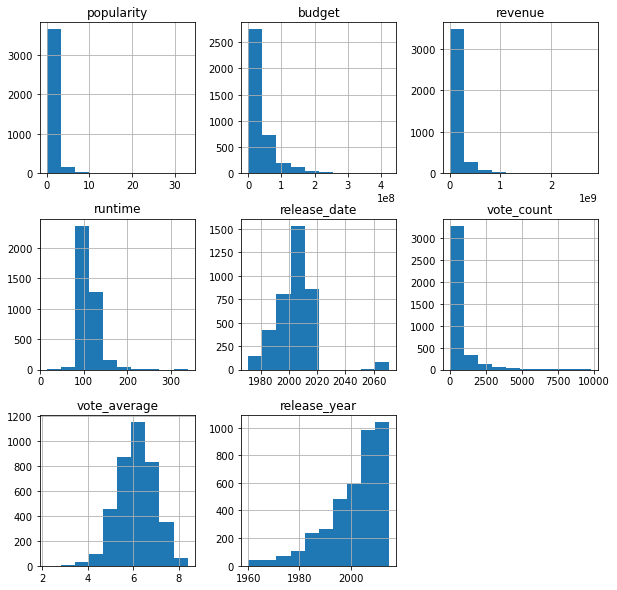

In [22]:
# Plotting Histogram from our columns in the dataframe
def f(x): return x
f(df)
f(df).hist(figsize=(10,10)) 
plt.show()

from the previous graphs we notice that, There is direct relation between Popularity, Revenue and Vote count. 

In [105]:
# Check the release years
df[df['release_year']>2021].sum()

popularity        0.0
budget            0.0
revenue           0.0
original_title    0.0
director          0.0
runtime           0.0
genres            0.0
vote_count        0.0
vote_average      0.0
release_year      0.0
dtype: float64

In [106]:
df.nunique()

popularity        3851
budget             406
revenue           3753
original_title    3807
director          1713
runtime            139
genres            1053
release_date      2884
vote_count        1274
vote_average        53
release_year        56
dtype: int64

## Exploratory Data Analysis

### Q1 What is the highest movie revenue?

In [118]:
highest_movie_revenue=df.loc[df['revenue'].idxmax()]
highest_movie_revenue

popularity                                        9.432768
budget                                         237000000.0
revenue                                       2781505847.0
original_title                                      Avatar
director                                     James Cameron
runtime                                              162.0
genres            Action|Adventure|Fantasy|Science Fiction
release_date                           2009-12-10 00:00:00
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
Name: 1386, dtype: object

### Q2 What is the highest movie budget?

In [121]:
# The highest movie budget
highest_movie_budget=df.loc[df['budget'].idxmax()]
highest_movie_budget

popularity                                          0.25054
budget                                          425000000.0
revenue                                          11087569.0
original_title                            The Warrior's Way
director                                         Sngmoo Lee
runtime                                               100.0
genres            Adventure|Fantasy|Action|Western|Thriller
release_date                            2010-12-02 00:00:00
vote_count                                               74
vote_average                                            6.4
release_year                                           2010
Name: 2244, dtype: object

### Q3 What is the highest movie profit?

In [129]:
# The highest movie profit
highest_movie_profit=df.loc[(df['revenue']-df['budget']).idxmax()]
highest_movie_profit

popularity                                        9.432768
budget                                         237000000.0
revenue                                       2781505847.0
original_title                                      Avatar
director                                     James Cameron
runtime                                              162.0
genres            Action|Adventure|Fantasy|Science Fiction
release_date                           2009-12-10 00:00:00
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
Name: 1386, dtype: object

### Q4 How much movies released over the years?

In [163]:
# Movies released over the years
No_of_movies_per_years=df.groupby('release_year').count()['genres']
No_of_movies_per_years

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     57
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    127
2003    121
2004    147
2005    163
2006    169
2007    165
2008    166
2009    174
2010    178
2011    199
2012    158
2013    180
2014    165
2015    160
Name: genres, dtype: int64

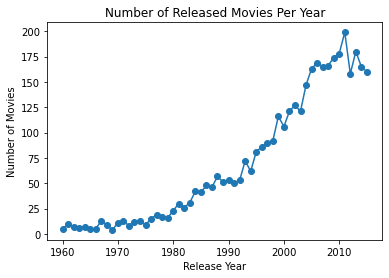

In [165]:
# Plotting a graph shows Number of Released Movies Per Year.
No_of_movies_per_years.plot(xlabel='Release Year',ylabel='Number of Movies',marker='o')
plt.title('Number of Released Movies Per Year')
plt.show()

From  the previous graph, we notice that the number of movies increased by years.

### Q5 What is the most vote average movie?

In [168]:
# The most vote average movie
most_vote_average_movie = df.loc[df.vote_average.idxmax()]
most_vote_average_movie

popularity                        7.192039
budget                          25000000.0
revenue                         28341469.0
original_title    The Shawshank Redemption
director                    Frank Darabont
runtime                              142.0
genres                         Drama|Crime
release_date           1994-09-10 00:00:00
vote_count                            5754
vote_average                           8.4
release_year                          1994
Name: 4178, dtype: object

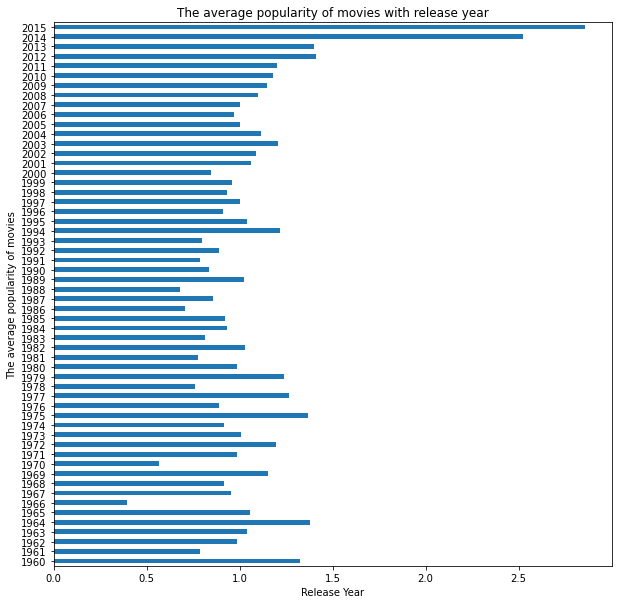

In [26]:
pobularity_of_movies = df.groupby('release_year').mean()['popularity']
pobularity_of_movies.plot(kind='barh',figsize=(10,10))
plt.title('The average popularity of movies with release year')
plt.xlabel('Release Year')
plt.ylabel('The average popularity of movies')
plt.show()

From the previous graph, we notice that the popularity of movies increased by years.

## Conclusion 
   - There is direct relation between Popularity, Revenue and Vote count.
   - The highest movie revenue is Avatar and its director James Cameron with 2781505847 revenue.
   - The highest movie budget is The Warrior's Way and its director Sngmoo Lee with 425000000 budget.
   - The highest movie profit is Avatar and its director James with 2544505847 profit.
   - There is direct relation between the number of movies and release year.
   - Yhe most vote average movie is The Shawshank Redemption and its director Frank Darabont wit 8.4 vote average.
    

## Limitation
  - The movie rating may be not fair because of its few vote count and low popularity.
  